# ***Importing Libraries***

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.pipeline import Pipeline
from time import time
from numpy import array
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# ***Function Defination***

In [7]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test,name):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    f1score = f1_score(y_test,y_pred)
    precisionscore = precision_score(y_test,y_pred)
    recallscore = recall_score(y_test,y_pred)
    pred_prob = sentiment_fit.predict_proba(x_test)
    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    plt.plot(fpr1, tpr1, linestyle='--',color='orange', label=name)
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    plt.show();
    
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    print ("f1 score: {0:.2f}%".format(f1score))
    print ("recall score: {0:.2f}%".format(precisionscore))
    print ("precision score: {0:.2f}%".format(recallscore))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time, sentiment_fit, pred_prob[:,1]

def classifier_comparator(vectorizer, n_features=10000, stop_words=None, ngram_range=(1, 1), classifier = None):
    result = []
    dictionary = {"Multinomial NB":[],"AdaBoost":[]}
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
          checker_pipeline = Pipeline([
              ('vectorizer', vectorizer),
              ('classifier', c)
          ])
          print ("test result for {}".format(n))
          print (c)
          clf_accuracy,tt_time,pipe,pred = accuracy_summary(checker_pipeline, x_train, y_train, x_test, y_test,n)
          dictionary[n] = pred
          result.append((n,clf_accuracy,tt_time))
    return result,pipe,dictionary

# ***Importing and Formating Data***

In [8]:
data_train = pd.read_csv("/content/drive/MyDrive/university_work/data/train_spam.csv")
data_test = pd.read_csv("/content/drive/MyDrive/university_work/data/test.csv")
data_val = pd.read_csv("/content/drive/MyDrive/university_work/data/val_spam.csv")


In [9]:
x_train = data_train['Message']
y_train = data_train['Category'].apply(lambda x: 0 if x == 'ham' else 1)

x_test = data_test['Message']
y_test = data_test['Category'].apply(lambda x: 0 if x == 'ham' else 1)

test result for Multinomial NB
MultinomialNB()


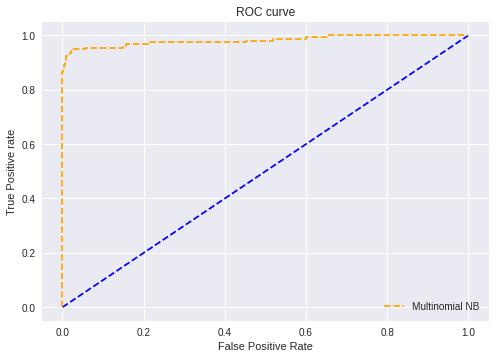

null accuracy: 86.58%
accuracy score: 93.25%
f1 score: 0.66%
recall score: 1.00%
precision score: 0.50%
model is 6.67% more accurate than null accuracy
train and test time: 0.70s
--------------------------------------------------------------------------------
test result for AdaBoost
AdaBoostClassifier()


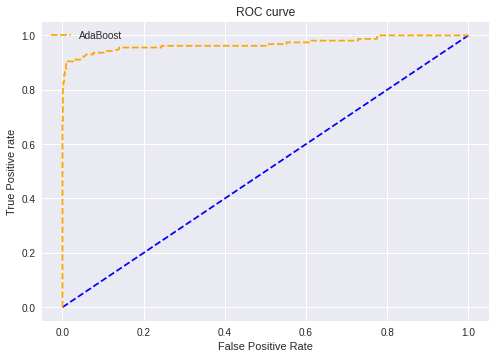

null accuracy: 86.58%
accuracy score: 97.61%
f1 score: 0.90%
recall score: 0.97%
precision score: 0.85%
model is 11.03% more accurate than null accuracy
train and test time: 3.01s
--------------------------------------------------------------------------------


In [11]:
names = ["Multinomial NB", 
            "AdaBoost"]
classifiers = [
      MultinomialNB(),
      AdaBoostClassifier(),
      ]
zipped_clf = zip(names,classifiers)
tvec = TfidfVectorizer()

trigram_result,pipe,dicto = classifier_comparator(tvec,n_features=100000,stop_words = None,ngram_range=(1,3),classifier = zipped_clf)

In [13]:
temp = pd.DataFrame.from_dict(dicto)

In [16]:
temp.to_csv("/content/drive/MyDrive/university_work/data/roc.csv")

AttributeError: ignored

In [ ]:
data_ = pd.read_csv("/content/drive/MyDrive/university_work/data/spam.csv")


x_data = data['Message']
y_data = data['Category'].apply(lambda x: 0 if x == 'ham' else 1)

# ***classifier***

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
test result for Multinomial NB
MultinomialNB()


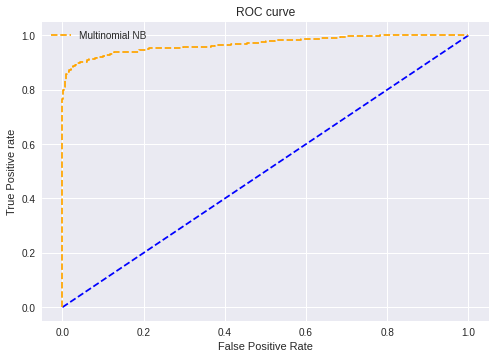

null accuracy: 86.25%
accuracy score: 92.53%
f1 score: 0.63%
recall score: 1.00%
precision score: 0.46%
model is 6.28% more accurate than null accuracy
train and test time: 0.42s
--------------------------------------------------------------------------------
test result for AdaBoost
AdaBoostClassifier()


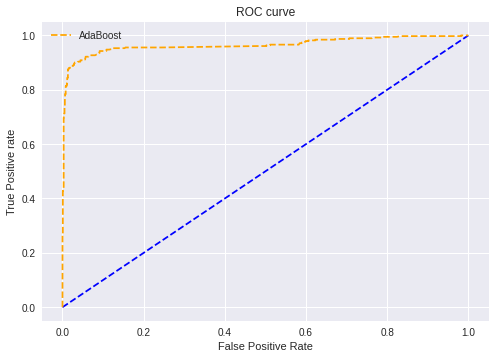

null accuracy: 86.25%
accuracy score: 96.73%
f1 score: 0.87%
recall score: 0.94%
precision score: 0.81%
model is 10.48% more accurate than null accuracy
train and test time: 1.26s
--------------------------------------------------------------------------------
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
test result for Multinomial NB
MultinomialNB()


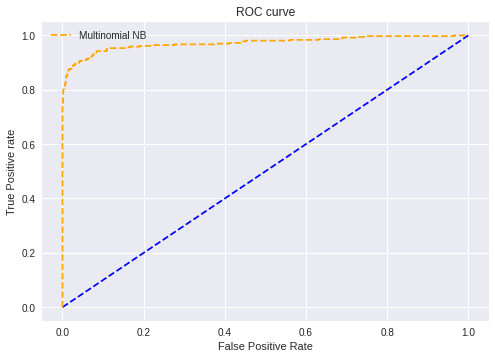

null accuracy: 86.93%
accuracy score: 92.93%
f1 score: 0.63%
recall score: 1.00%
precision score: 0.46%
model is 5.99% more accurate than null accuracy
train and test time: 0.40s
--------------------------------------------------------------------------------
test result for AdaBoost
AdaBoostClassifier()


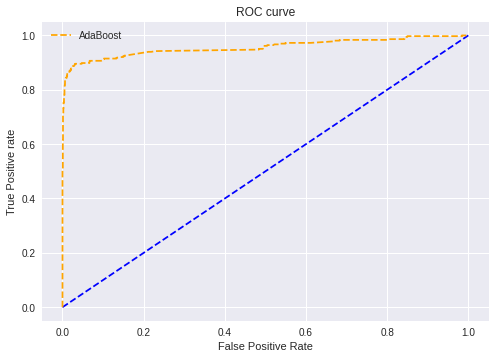

null accuracy: 86.93%
accuracy score: 97.02%
f1 score: 0.88%
recall score: 0.96%
precision score: 0.80%
model is 10.09% more accurate than null accuracy
train and test time: 1.23s
--------------------------------------------------------------------------------


In [ ]:
kfold  =  KFold(n_splits=2, random_state=True, shuffle=True)

for data_train, data_test in kfold.split(data):
  x_train, x_test = x_data[data_train], x_data[data_test]
  y_train, y_test = y_data[data_train], y_data[data_test]

  names = ["Multinomial NB", 
            "AdaBoost"]
  classifiers = [
      MultinomialNB(),
      AdaBoostClassifier(),
      ]
  zipped_clf = zip(names,classifiers)
  tvec = TfidfVectorizer()
  %%time
  trigram_result,pipe = classifier_comparator(tvec,n_features=100000,stop_words = None,ngram_range=(1,3),classifier = zipped_clf)

IndentationError: ignored